In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
# key = os.environ.get('AZURE_SEARCH_KEY', '0d933662c12840e19f631798f938419a')

In [4]:
# beer_types = 'guiness','lager','ale','stout','irish red ale', 'porter'
path = Path('beers')

In [5]:
# if not path.exists():
#     path.mkdir()
#     for o in beer_types:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} beer in a glass')
#         download_images(dest, urls=results.attrgot('contentUrl'))

In [6]:
# fns = get_image_files(path)
# fns

In [7]:
# failed = verify_images(fns)
# failed

In [8]:
# failed.map(Path.unlink);

In [30]:
beers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [31]:
dls = beers.dataloaders(path)

In [32]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

c:\Users\LukeLewis-Borrell\mambaforge\envs\fastbook\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\LukeLewis-Borrell\mambaforge\envs\fastbook\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.598850,1.868598,0.556962,00:40


epoch,train_loss,valid_loss,error_rate,time
0,1.691886,1.565294,0.518987,00:47
1,1.500662,1.510544,0.462025,00:45
2,1.222215,1.498336,0.443038,00:42
3,1.013874,1.482718,0.417722,00:42
4,0.875277,1.476268,0.411392,00:42


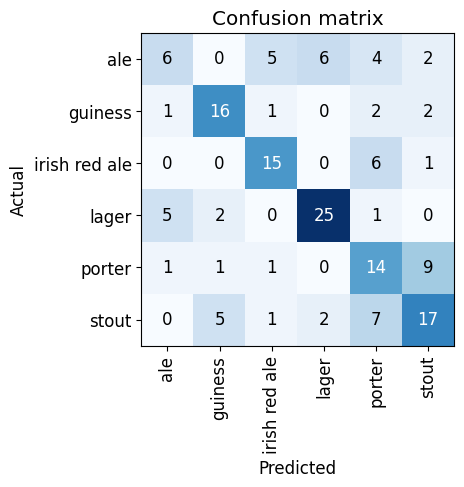

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

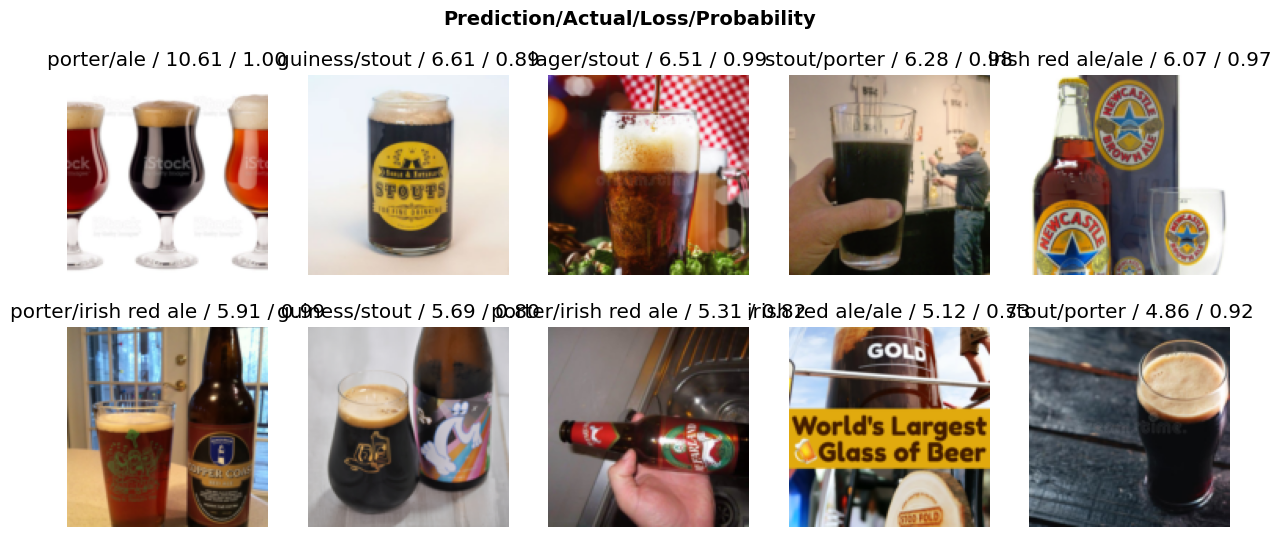

In [34]:
interp.plot_top_losses(10, nrows=2)

In [35]:
interp.print_classification_report()

               precision    recall  f1-score   support

          ale       0.46      0.26      0.33        23
      guiness       0.67      0.73      0.70        22
irish red ale       0.65      0.68      0.67        22
        lager       0.76      0.76      0.76        33
       porter       0.41      0.54      0.47        26
        stout       0.55      0.53      0.54        32

     accuracy                           0.59       158
    macro avg       0.58      0.58      0.58       158
 weighted avg       0.59      0.59      0.58       158



In [36]:
cleaner = ImageClassifierCleaner(learn)
cleaner

c:\Users\LukeLewis-Borrell\mambaforge\envs\fastbook\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [28]:
#hide
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [38]:
learn.dls.vocab

['ale', 'guiness', 'irish red ale', 'lager', 'porter', 'stout']